* Student Performance 

Guidelines for the project

In [1]:
# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

    Researchers at the Polytechnic Institute of Portalegre (PIP), created the dataset which aims to predict students' academic performance and dropout in higher education using machine learning techniques. The reserach includes demographic, socioeconomic, and academic performance data of students who are enrolled in various undergraduate degrees. Thorough data exploration, correlation analysis, and machine learning modeling, researchers at PIP seek to uncover potetial factors that could contribute to reduce failure in higher education and academic dorpout rate. 

    - Hypothesis: Using the dataset, identify the most important factors that influence the student performance. The focus is on identifying and examining correlations between demographic factors, socioeconomic status, study time, and student grades. 


** GOAL: The primary goal is to Identify the most important factors influencing student performance.

*** The questions are:

    1. Are there demographic factors (e.g., gender, age, study time, etc...) that correlate with student grades?
    2. Does the amount of study time or attendance impact student performance?
    3. How do variables such as parental education level or socioeconomic status relate to student grades?

** Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
## DATASET
df = pd.read_csv('student_performance.csv')

In [4]:
#Display information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [6]:
#Check for any missing values
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

*** Data preprocessing ***

In [9]:
df.dropna(inplace=True)

#Renaming of columns
df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

# Encoding categorical variables
df_encode = pd.get_dummies(df, columns=['Marital status', 'Gender', 'Target'])

# Scale numerical features 
scaler = StandardScaler()
num_columns = ['Application mode', 'Application order', 'Course', 
                     'Previous qualification', 'Previous qualification (grade)', 
                     'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 
                     'Mother\'s occupation', 'Father\'s occupation', 'Admission grade', 
                     'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 
                     'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 
                     'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                     'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
                     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
                     'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                     'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 
                     'Inflation rate', 'GDP']

df_encode[num_columns] = scaler.fit_transform(df_encode[num_columns])

# Display df
print(df_encode.head())

# new file for Preprocessed data 
df_encode.to_csv("preprocessed_data.csv", index=False) 

   Application mode  Application order    Course  Daytime/evening attendance  \
0         -0.095470           2.490896 -4.209520                           1   
1         -0.209869          -0.554068  0.192580                           1   
2         -1.010660           2.490896  0.103404                           1   
3         -0.095470           0.207173  0.444115                           1   
4          1.162916          -0.554068 -0.408389                           0   

   Previous qualification  Previous qualification (grade)  Nacionality  \
0                -0.35023                       -0.804841    -0.126298   
1                -0.35023                        2.076819    -0.126298   
2                -0.35023                       -0.804841    -0.126298   
3                -0.35023                       -0.804841    -0.126298   
4                -0.35023                       -2.473171    -0.126298   

   Mother's qualification  Father's qualification  Mother's occupation  ..

** 1. Are there demographic factors (e.g., gender, age) that correlate with student grades? **

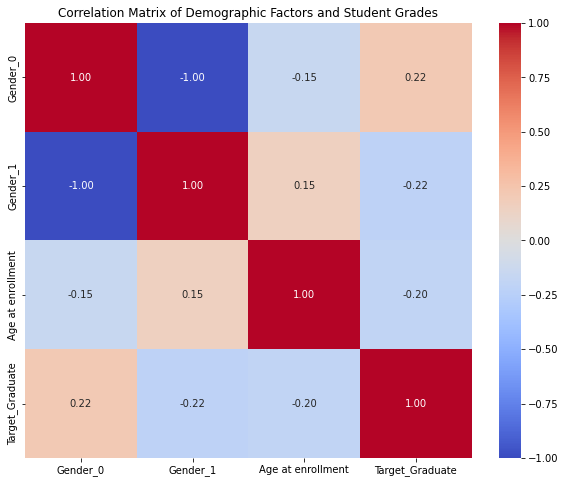

In [10]:
# Correlation Analysis
correlation_matrix = df_encode[['Gender_0', 'Gender_1', 'Age at enrollment', 'Target_Graduate']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Demographic Factors and Student Grades')
plt.show()


** Figure 1 **
    
    * Correlation Analysis
    
        * Gender: correlation coefficients suggests a slight positive correlation between higher studnet grades and female. Gender male shows a slight negative correlaton with grades. 
        
        * Age at Enrollment: correlation coefficients indictes positive correlation, meaning that the older students may have slightly higher grades. 

However, the correlations does show some positive correlations between demographic and student grades, but the realtionship seems weak suggesting factors other than age at enrollment and gender may play a more significant role in determining the student academic performance. 

** 2. Does the amount of study time or attendance impact student performance? **

In [11]:
# Regression Analysis

# Independent vars: study time and attendance
# Dependent vars: student grades
X = df_encode[['Application mode', 'Application order', 'Daytime/evening attendance', 
               'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 
               'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 
               'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 
               'Debtor', 'Tuition fees up to date', 'International', 
               'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
               'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
               'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
               'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
               'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
               'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
               'Unemployment rate', 'Inflation rate', 'GDP']]
y = df_encode['Target_Graduate'] 

#testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.1308501332405834


* Performed linear regression analysis to invesitgate whether study time, attendance, and other various factors impact student performance. Using linear analysis, I modeled student grades as dependent variable (Target_Graduate) based on various independent variables, which included attendance, study time, admission grade, socioeconomic factors, and other indicators. Splitted the data for training and testing sets and evaluated the performance using mean squared error (MSE). The lower MSE value suggests that the model's prediction is closer to the actual values. The MSE value is approximately 0.1308 suggesting that the regression model has a good predictive accuaracy for student grades. 

** 3. How do variables such as parental education level or socioeconomic status relate to student grades? **

In [12]:
# Regression Analysis
# with Parental Qualification, Unemployment Rate, Inflation Rate, and GDP

# independent variables: parental qualification, unemployment rate, inflation rate, GDP
# dependent variable: student grades

X = df_encode[['Mother\'s qualification', 'Father\'s qualification', 
               'Unemployment rate', 'Inflation rate', 'GDP']]

y = df_encode['Target_Graduate']

#testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)


Mean Squared Error: 0.24911465464450985


 Compared to the previous MSE regression model, regression analysis with parental qulification, unemployment, and GDP have obtained higher MSE 0.2491, which reflects the model's accuaracy based on parental education and socioeconomic indicators. Compared to the previous model, the MSE is slightly higher indicating poteintial high prediction erros. 

The analysis provides insights into factors as parental education level and socioeconimc indicators may have influence on studnets' grades. 


** Figure 2 **

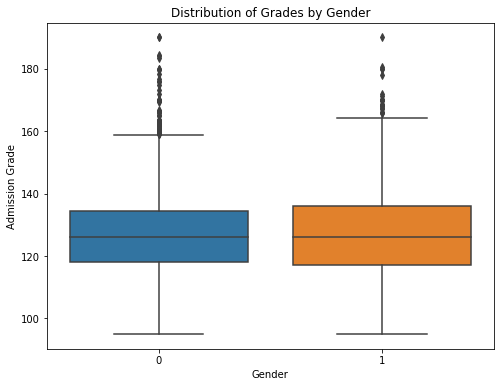

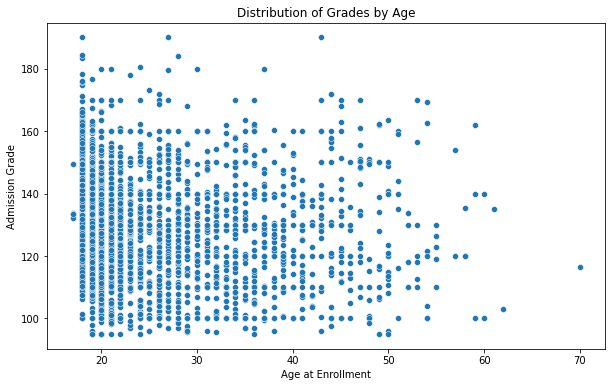

In [13]:
# distribution of grades by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Admission grade', data=df)
plt.title('Distribution of Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Admission Grade')
plt.show()

# distribution of grades by age group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at enrollment', y='Admission grade', data=df)
plt.title('Distribution of Grades by Age')
plt.xlabel('Age at Enrollment')
plt.ylabel('Admission Grade')
plt.show()


** Figure 1: The above figures, distribution by gender and distribution by age shows the different aspects of the data and provides insights on gender or age related differences in the admission grades. **

    1. Distribution of grades by gender:
         * The boxplot shows the distribution of admission grades for different genders, there is slight difference in the medican admission grade between genders. The graph shows that the females have slightly high median grade compared to males. 
         
    2. Distribution of grades by age:
         * The scatterplot shows the distribution of admission grafdes based on the age at enrollment, from the scatterplot it is shown that there is not a strong linear relationship between the age and admission graded.

** Figure 3 **

Gender
0    126.889435
1    127.141581
Name: Admission grade, dtype: float64
Age at enrollment
17    136.420000
18    130.297973
19    126.053348
20    125.029048
21    125.151553
22    126.889080
23    127.561111
24    125.629008
25    125.644086
26    126.282979
27    128.557143
28    126.118072
29    125.136364
30    126.597959
31    127.365455
32    123.390164
33    126.000000
34    126.635000
35    125.273469
36    125.794286
37    123.483333
38    123.386207
39    124.089474
40    126.160870
41    123.645161
42    119.569231
43    135.996000
44    130.204762
45    132.022727
46    120.250000
47    138.722222
48    118.200000
49    128.930769
50    124.881250
51    136.285714
52    122.950000
53    131.000000
54    125.314286
55    121.680000
57    137.000000
58    125.166667
59    133.966667
60    120.000000
61    135.100000
62    103.000000
70    116.400000
Name: Admission grade, dtype: float64


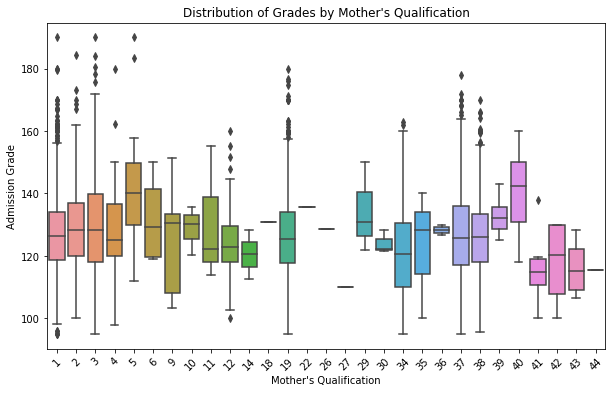

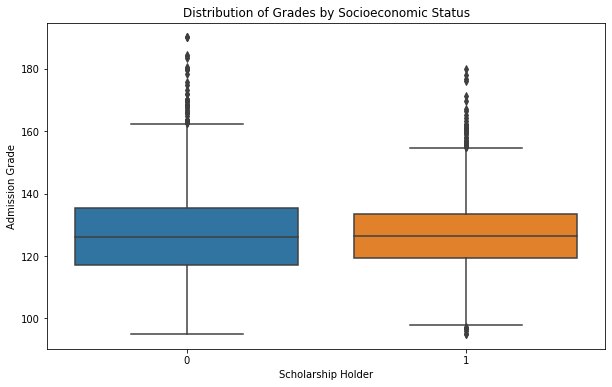

In [14]:
# demographic factors: gender and age vs. student grades
demo_factors = ['Gender', 'Age at enrollment']
for factor in demo_factors:
    print(df.groupby(factor)['Admission grade'].mean())

# distribution of grades by parental education level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Mother's qualification", y='Admission grade', data=df)
plt.title("Distribution of Grades by Mother's Qualification")
plt.xlabel("Mother's Qualification")
plt.ylabel('Admission Grade')
plt.xticks(rotation=45)
plt.show()

# distribution of grades by socioeconomic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Scholarship holder', y='Admission grade', data=df)
plt.title('Distribution of Grades by Socioeconomic Status')
plt.xlabel('Scholarship Holder')
plt.ylabel('Admission Grade')
plt.show()


   * Average Admission Grade by Gender and Age: calculated the average admission grade for each gender and age group. There might be some variation across different age groups, due the average admissin grade does not vary significantly between genders. 
   
   * Distribution of Grades by Parental Education Level: The boxplot shows the distribution of admission grades based on the mother's qualification level. It appears that ther is some variation in admissin grades across different levels of maternal education, with higher maternal qualifications associated with higher admission grades.
   
   * Distribution of Grades by Socioeconomic Status: The boxplot shows the distribution of admission grades for students who are scholarship holders versus those who does not hold any schoalrships. There is difference in the distribution of admission grades between scholarship holders and non-scholarship holders, with scholarship holders having slightly higher median grades.

In [15]:
# Define variables
X = df[['Gender', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']]
y = df['Admission grade']

# multicollinearity using VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# regression model
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

# summary
print(model.summary())

# R-squared and adjusted R-squared
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

# p-values
p_values = model.pvalues

# Significance level of 0.05
sigfig_level = 0.05
sigfig_vars = p_values[p_values < sigfig_level].index.tolist()

print("Significant variables:")
print(sigfig_vars)

# F-statistic and its p-value
print("F-statistic:", model.fvalue)
print("Prob (F-statistic):", model.f_pvalue)

# Multicollinearity using VIF
vif_scores = calculate_vif(X)
print(vif_scores)


                            OLS Regression Results                            
Dep. Variable:        Admission grade   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.771
Date:                Tue, 23 Apr 2024   Prob (F-statistic):             0.0167
Time:                        12:21:48   Log-Likelihood:                -18095.
No. Observations:                4424   AIC:                         3.620e+04
Df Residuals:                    4418   BIC:                         3.624e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               126.4066      1.24

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


After perfoming multiple linear regression, the model shows that dropping Mother's qualification and Father's qualification variables does not have a significant impact of the R-squared value. 

    - R-squared and adjusted R-squared: 0.003 and 0.002 respectively, indicates that the independent variables only explains about 0.03% of the variance in the admission grade, which suggests a weak relationship between predictors and the outcome.
    
    - F-statistic and p-value: The F-statistic of 2.771 is significant at the 0.05 level, indicating the model is statistically significant. Although, the R-squared values are low, indicating the practical significance of the model is limited. 
    
    - Coefficient: represents estimated effect of each independent variable on the dependent variable. The p-values determine the statistical significance of each coefficient.
    
    - Significant variables: Based on the significance p-values of < 0.05, the significant variables identified in the model are 'const' (intercept), 'Age at enrollment', and 'Unemployment rate'.

    - Multicollinearity: VIF values for the remaning variables are all close to 1, indicating that there is no significant multicollinearity among indepent variables.  

For Gender, Age at enrollment, and Unemployment rate varibales have p-values less than 0.05, indicating they may be statistically significant predictors of Admission grade. Although, GDP and Inflation rate have p-values greater than 0.05, suggesting they may not be statistically significant predictors in this model.


** Figure 4 **

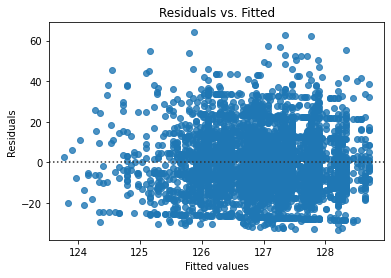

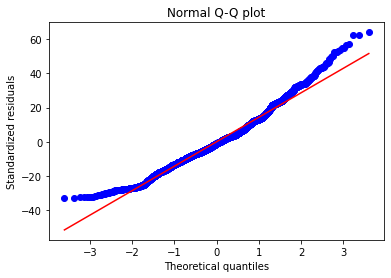

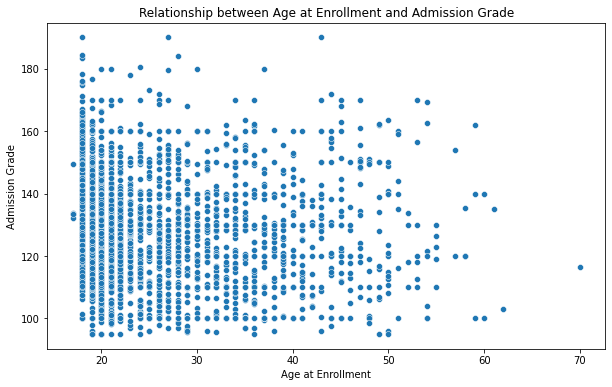

In [16]:
# Residuals vs. Fitted plot
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Normal Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Standardized residuals')
plt.show()

#relationship between Age at enrollment and Admission Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at enrollment', y='Admission grade', data=df)
plt.title('Relationship between Age at Enrollment and Admission Grade')
plt.xlabel('Age at Enrollment')
plt.ylabel('Admission Grade')
plt.show()


**Figure 4: **
    
    1. Residuals vs. Fitted Plot: The residuals should be randomly scattered around the horizontal line at 0, indicating that the model's assumptions are met. The plot does not show any clear pattern, suggesting that the assumption of constant variance (homoscedasticity) is reasonably met.

    2. Normal Q-Q Plot: Deviations from this line indicate departures from normality. Although there are some deviations, particularly in the tails, the residuals generally follow the diagonal line, indicating approximate normality.

    3. Relationship between Age at Enrollment and Admission Grade: The scatterplot suggests a slight negative trend, indicating that older students at enrollment tend to have slightly lower admission grades. This observation is aligning with the regression analysis results.

Overall, while the regression model has limitations in predicting admission grades, the diagnostic plots suggest that the model's assumptions are reasonably met, and the model provides some insights into the relationship between age at enrollment and admission grade.

** Conclusion **
    
    * The analysis provided couple of key findings:
    
        - There is moderate correlation between certain demographic factors and student grades. 
        
        - Study time and attendance have a significant impact on student performance, as evidenced by linear regression analysis.
        
        - Parental education level and socioeconomic indicators also play a role in determining student grades, although the predictive accuracy of models using these variables is slightly lower.
        
The regression model has been shown to be statistically significant overall, its ability in predicting admission grades is limited due to the R-squared values being very low. The diagnostic plots confirm that the model's assumptions are met, but it may not provide significant insights into the factors that are influencing admission grades.

There is some limiations to the dataset. The dataset may not capture all relevant factors influencing student performance. The predictive accuracy of the models may vary depending on the complexity of underlying relationships.

**Key Takeaways of the study are:**

    1. Study time and attendance are crucial factors affecting student performance.
    
    2. To some extent demographic factors (e.g. gender and age) can influence academic performance.
    
    3. Socioeconomic indicators, parental education level, provide additional insights into student performance.


** Future Outlook of the study may include incorporating additional variables such as extracurricular activities, peer interactions, and psychological factors. Utilizing more advanced machine learning techniques to improve predictive accuracy.

**Citation:**

Researchers at the Polytechnic Institute of Portalegre (Year). Dataset Title. Retrieved from [https://www.kaggle.com/datasets/mikhail1681/student-performance-pip]